# ResNet

给定输入边长$N$，卷积核大小$K$，填充大小$P$，和步长$S$，单侧边长的输出大小$O$（不考虑批次大小和深度）可以通过下面的公式计算：
$$ O = \frac{N - K + 2P}{S} + 1 $$

## with pytorch
![](./images/resnet18.png)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

### 定义网络

In [5]:
class MyResNet18(nn.Module):
    def __init__(self):
        super(MyResNet18, self).__init__()
        # 第一层：卷积层
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        # Max Pooling 层
        self.s1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # 第二、三、四、五层：“实线”卷积层
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(64)
        # 第六、七层：“虚线”卷积层
        self.conv6_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1)
        self.bn6_1 = nn.BatchNorm2d(128)
        self.conv7_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn7_1 = nn.BatchNorm2d(128)
        self.conv7 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=2, padding=0)
        self.bn7 = nn.BatchNorm2d(128)
        # 第八、九层：“实线”卷积层
        self.conv8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn8 = nn.BatchNorm2d(128)
        self.conv9 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn9 = nn.BatchNorm2d(128)
        # 第十、十一层：“虚线”卷积层
        self.conv10_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1)
        self.bn10_1 = nn.BatchNorm2d(256)
        self.conv11_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn11_1 = nn.BatchNorm2d(256)
        self.conv11 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=2, padding=0)
        self.bn11 = nn.BatchNorm2d(256)
        # 第十二 、十三层：“实线”卷积层
        self.conv12 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn12 = nn.BatchNorm2d(256)
        self.conv13 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn13 = nn.BatchNorm2d(256)
        # 第十四、十五层：“虚线”卷积层
        self.conv14_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=2, padding=1)
        self.bn14_1 = nn.BatchNorm2d(512)
        self.conv15_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn15_1 = nn.BatchNorm2d(512)
        self.conv15 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=2, padding=0)
        self.bn15 = nn.BatchNorm2d(512)
        # 第十六 、十七层：“实线”卷积层
        self.conv16 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn16 = nn.BatchNorm2d(512)
        self.conv17 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn17 = nn.BatchNorm2d(512)
        # avg pooling 层
        self.s2 = nn.AvgPool2d(kernel_size=7, stride=1, padding=0)
        # 第十八层：全连接层
        self.Flatten = nn.Flatten()
        self.f18 = nn.Linear(512, 1000)
        # 为满足该实例另加 ↓
        self.f_output = nn.Linear(1000, 10)

    def forward(self, x):              # shape: torch.Size([1, 3, 224, 224])
        x = self.conv1(x)              # shape: torch.Size([1, 64, 112, 112])
        x = self.bn1(x)                # shape: torch.Size([1, 64, 112, 112])
        x = self.s1(x)                 # shape: torch.Size([1, 64, 56, 56])
        x = self.conv2(x)              # shape: torch.Size([1, 64, 56, 56])
        x = self.bn2(x)                # shape: torch.Size([1, 64, 56, 56])
        x = self.conv3(x)              # shape: torch.Size([1, 64, 56, 56])
        x = self.bn3(x)                # shape: torch.Size([1, 64, 56, 56])
        x = self.conv4(x)              # shape: torch.Size([1, 64, 56, 56])
        x = self.bn4(x)                # shape: torch.Size([1, 64, 56, 56])
        x = self.conv5(x)              # shape: torch.Size([1, 64, 56, 56])
        x = self.bn5(x)                # shape: torch.Size([1, 64, 56, 56])
        x6_1 = self.conv6_1(x)         # shape: torch.Size([1, 128, 28, 28])
        x7_1 = self.conv7_1(x6_1)      # shape: torch.Size([1, 128, 28, 28])
        x7 = self.conv7(x)             # shape: torch.Size([1, 128, 28, 28])
        x = x7 + x7_1                  # shape: torch.Size([1, 128, 28, 28])
        x = self.conv8(x)              # shape: torch.Size([1, 128, 28, 28])
        x = self.conv9(x)              # shape: torch.Size([1, 128, 28, 28])
        x10_1 = self.conv10_1(x)       # shape: torch.Size([1, 256, 14, 14])
        x11_1 = self.conv11_1(x10_1)   # shape: torch.Size([1, 256, 14, 14])
        x11 = self.conv11(x)           # shape: torch.Size([1, 256, 14, 14])
        x = x11 + x11_1                # shape: torch.Size([1, 256, 14, 14])
        x = self.conv12(x)             # shape: torch.Size([1, 256, 14, 14])
        x = self.conv13(x)             # shape: torch.Size([1, 256, 14, 14])
        x14_1 = self.conv14_1(x)       # shape: torch.Size([1, 512, 7, 7])
        x15_1 = self.conv15_1(x14_1)   # shape: torch.Size([1, 512, 7, 7])
        x15 = self.conv15(x)           # shape: torch.Size([1, 512, 7, 7])
        x = x15 + x15_1                # shape: torch.Size([1, 512, 7, 7])
        x = self.conv16(x)             # shape: torch.Size([1, 512, 7, 7])
        x = self.conv17(x)             # shape: torch.Size([1, 512, 7, 7])
        x = self.s2(x)                 # shape: torch.Size([1, 512, 1, 1])
        x = self.Flatten(x)            # shape: shape: torch.Size([1, 512])
        x = self.f18(x)                # shape: torch.Size([1, 1000])
        # 为满足该实例另加 ↓
        x = self.f_output(x)           # shape: torch.Size([1, 10])
        x = F.softmax(x, dim=1)        # shape: torch.Size([1, 10])
        return x

### 准备数据

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(224),    # 缩放图像大小为 224*224
    transforms.ToTensor()     # 仅对数据做转换为 tensor 格式操作
])

# 加载训练数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_transform, download=True)
# 给训练集创建一个数据集加载器
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
# 加载测试数据集
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_transform, download=True)
# 给测试集创建一个数据集加载器
test_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)

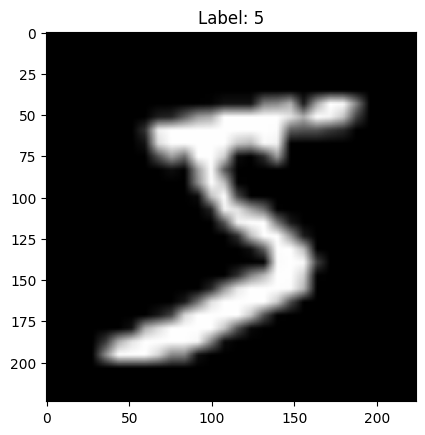

In [15]:
import matplotlib.pyplot as plt

image, label = train_dataset[0]

# `image`现在是一个[C, H, W]的Tensor，使用matplotlib展示之前，需要转换为[H, W, C]或[H, W]的格式
image = image.permute(1, 2, 0)
# 或者因为MNIST是灰度图，所以实际只需要将通道维度去掉 
# image = image.squeeze()

plt.imshow(image, cmap="gray") # 使用灰度色彩映射
plt.title(f'Label: {label}')
plt.show()

### 其他定义

In [16]:
# 如果显卡可用，则用显卡进行训练
device = "cuda" if torch.cuda.is_available() else 'cpu'

# 调用 net 里定义的模型，如果 GPU 可用则将模型转到 GPU
model = MyResNet18().to(device)

# 定义损失函数（交叉熵损失）
loss_fn = nn.CrossEntropyLoss()
# 定义优化器（SGD：随机梯度下降）
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
# 学习率每隔 10 个 epoch 变为原来的 0.1
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# 定义训练函数
def train(dataloader, model, loss_fn, optimizer):
    loss, current, n = 0.0, 0.0, 0
    for batch, (X, y) in enumerate(dataloader):
        # 单通道转为三通道
        X = np.array(X)
        X = X.transpose((1, 0, 2, 3))             # array 转置
        image = np.concatenate((X, X, X), axis=0)
        image = image.transpose((1, 0, 2, 3))     # array 转置回来
        image = torch.tensor(image)               # 将 numpy 数据格式转为 tensor
        # 前向传播
        image, y = image.to(device), y.to(device)
        output = model(image)
        cur_loss = loss_fn(output, y)
        _, pred = torch.max(output, axis=1)
        cur_acc = torch.sum(y == pred) / output.shape[0]
        # 反向传播
        optimizer.zero_grad()
        cur_loss.backward()
        optimizer.step()
        loss += cur_loss.item()
        current += cur_acc.item()
        n = n + 1
    print('train_loss：' + str(loss / n))
    print('train_acc：' + str(current / n))

# 定义测试函数
def test(dataloader, model, loss_fn):
    # 将模型转换为验证模式
    model.eval()
    loss, current, n = 0.0, 0.0, 0
    # 非训练，推理期用到（测试时模型参数不用更新，所以 no_grad）
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            # 单通道转为三通道
            X = np.array(X)
            X = X.transpose((1, 0, 2, 3))  # array 转置
            image = np.concatenate((X, X, X), axis=0)
            image = image.transpose((1, 0, 2, 3))  # array 转置回来
            image = torch.tensor(image)  # 将 numpy 数据格式转为 tensor
            image, y = image.to(device), y.to(device)
            output = model(image)
            cur_loss = loss_fn(output, y)
            _, pred = torch.max(output, axis=1)
            cur_acc = torch.sum(y == pred) / output.shape[0]
            loss += cur_loss.item()
            current += cur_acc.item()
            n = n + 1
        print('test_loss：' + str(loss / n))
        print('test_acc：' + str(current / n))

### 开始训练

In [ ]:
epoch = 100
for t in range(epoch):
    lr_scheduler.step()
    print(f"Epoch {t + 1}\n----------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
    torch.save(model.state_dict(), "save_model/{}model.pth".format(t))    # 模型保存
print("Done!")

## with fastai

In [3]:
from fastai.layers import *

In [2]:
def conv2(ni,nf):
    return ConvLayer(ni,nf,stride=2)